## ML Relate, batch 7
<br>

I want to check to see if there are any potentially contaminated samples across all lanes of sequencing. In the interest of retaining as many samples as possible to keep high sample sizes, I reran some of the samples identified as contaminated during batch 6 (only first four lanes of data).

To do this, I will first find sibling relationships in ML relate, then look at plate location and heterozygosity of those samples.

<br>
#### 9/5/2017
<br>
### One pop, all samples for ML Relate

ML Relate does this really interesting thing where it only allows you to include 1-2 populations in your genepop file. I found some helpful documentation on that: "Input files can have either one or two POP's (to use the GENEPOP term) in them. If the file has one POP, ML-Relate will estimate allele frequencies in the population from the individuals whose relatedness is being estimated. If the file has two POP's the first POP will be used to estimate allele frequencies and the second POP should contain the individuals to analzye. See the user's manual for more details. "

So I will include all of my samples in one population. 

**FILE:** `batch_7_filteredLoci20_filteredMAF_filteredIndivids_filteredHWE_genepop_onepop.txt`

Calculate relatedness using `Relationship` >> `Relatedness` >> `List Output`



**Read through ML Relate output for siblings**

In [2]:
cd ../analyses/ml_relate/batch_7

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses/ml_relate/batch_7


In [4]:
infile = open("batch_7_MLrelate_all_list.txt", "r")
outfile = open("batch_7_MLrelate_all_relatedIndivids.txt", "w")

outfile.write("relatedness\tsample1\tsample2\n")

for line in infile:
    if line.startswith("Ind1"):
        break

r_count = 0
u_count = 0

halfsibs = ""
hs_count = 0
fullsibs = ""
fs_count = 0
for line in infile:
    linelist = line.strip().split()
    if len(linelist) > 2:
        relate = linelist[2]
        if relate == "HS":
            halfsibs += relate + "\t" + linelist[0] + "\t" + linelist[1] + "\n"
            r_count += 1
            hs_count += 1
        elif relate == "FS":
            fullsibs += relate + "\t" + linelist[0] + "\t" + linelist[1] + "\n"
            r_count += 1
            fs_count += 1
        else:
            u_count += 1
infile.close()

outfile.write(fullsibs)
outfile.write(halfsibs)
outfile.close()

print r_count, " detected related pairs: ", hs_count, " half sib pairs & ", fs_count, " full sib pairs."
print u_count, " unrelated pairs"

85  detected related pairs:  40  half sib pairs &  45  full sib pairs.
44466  unrelated pairs


By looking at the pairs in excel, I found that: 

42 of 45 full sib pairs were replicates.

0 of 40 half sib pairs were replicates.

** Look for high heterozygosities **

<br>
<br>

### ML Relate on Each Pop Separately

### Heterozygosity & Read Depth

I'm wary of the ML Relate output. I'd like to cross check with heterozygosities for each individual. My usual plot for this is heterozygosity v. read depth. 

In [5]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses/ml_relate/batch_7'

In [8]:
cd ../../

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses


In [9]:
!python calc_het.py -h

usage: calc_het.py [-h] [-l LIST] [-i IND] [-f FILE] [-o OUTPUT]
                   [-d DENOMINATOR]

optional arguments:
  -h, --help            show this help message and exit
  -l LIST, --list LIST  white space delimited list of individuals (column1)
                        and corresponding sequence file (column2; FASTA or
                        FASTQ) to investigate
  -i IND, --ind IND     name of individual to investigate (mutually exclusive
                        to '-l' and requires '-f') - UNTESTED
  -f FILE, --file FILE  location of file with genotypes (assumes genepop
                        format)
  -o OUTPUT, --output OUTPUT
                        name of output file
  -d DENOMINATOR, --denominator DENOMINATOR
                        use 2 if counting a FASTA file or 4 if counting a
                        FASTQ file


In [11]:
!python calc_het.py \
-l batch_7_final_individs.txt \
-f ../stacks_b7_wgenome/batch_7_filteredLoci20_filteredMAF_filteredIndivids_filteredHWE_genepop.txt \
-o batch7_HetvReadDepth_filtered \
-d 4

In [12]:
!python ../scripts/countreads_fastq.py -h 

usage: countreads_fastq.py [-h] [-s SAMPLES] [-d DIRECTORY] [-os OUTPUTSHELL]
                           [-of OUTPUT]

count number of consensus seqs in .tags files

optional arguments:
  -h, --help            show this help message and exit
  -s SAMPLES, --samples SAMPLES
                        file with list of samples (if paired end, should
                        include .1 at end)
  -d DIRECTORY, --directory DIRECTORY
                        local path with directory with fastq files
  -os OUTPUTSHELL, --outputshell OUTPUTSHELL
                        bash shell script file name. must have file extension
                        .sh
  -of OUTPUT, --output OUTPUT
                        text file name to store read depths, with local path.
                        Do not include file extension


In [ ]:
!python ../scripts/countreads_fastq.py -s batch_7_final_individs.txt \
-d ../samplesT142 \
-os count_reads_fastq_b7.sh \
-of fastq_readcounts_b7.txt

*combined manually into same text file*

In [13]:
!head batch7_HetvReadDepth_filtered

sample	n_reads	prop_het
PO010715_02	6817653	0.182099402
PO010715_02_rep	7823165	0.181930693
PO010715_04	3432097	0.172599338
PO010715_06.1	2473192	0.166666667
PO010715_08.1	2503625	0.171535115
PO010715_10.1	3106846	0.177055291
PO010715_11.1	3372281	0.18147918
PO010715_12	3295834	0.165909091
PO010715_17.1	2645508	0.168366285


In [14]:
infile = open("batch7_HetvReadDepth_filtered", "r")
infile.readline()

reads = []
het = []
for line in infile:
    reads.append(float(line.strip().split()[1]))
    het.append(float(line.strip().split()[2]))
infile.close()

In [15]:
import numpy as np
import matplotlib.pyplot as plt

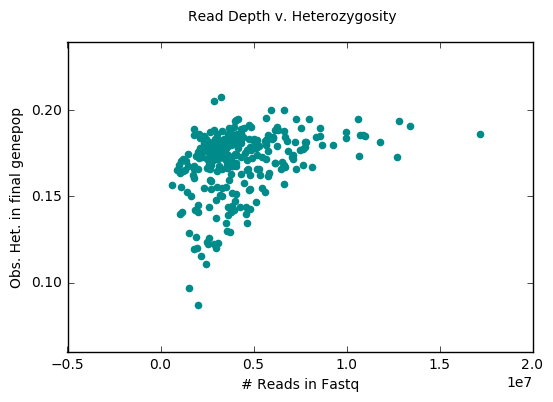

In [16]:
plt.scatter(reads, het, color="darkcyan")
plt.suptitle("Read Depth v. Heterozygosity")
plt.xlabel("# Reads in Fastq")
plt.ylabel("Obs. Het. in final genepop")
plt.show()

In [17]:
plt.close()